# VGG Net Architecture Comparison

This notebook compares between 5 variants of the VGG Net architecture
outlined in https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049
and selects the best performer for further hyper-parameter tuning.

Published paper: https://arxiv.org/abs/1409.1556


In [9]:
from gc import collect
from typing import Tuple

import numpy as np
from h5py import File
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import ConfigProto, Session
from tensorflow.keras.backend import set_session, clear_session
from tensorflow.keras.callbacks import CSVLogger, LearningRateScheduler, \
    ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_random_seed
from pandas import read_csv
import matplotlib.pyplot as plt


In [2]:
# Improve GPU memory utilisation
config = ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = Session(config=config)
set_session(sess)

# Fix tensorflow random seed
set_random_seed(324)



### Model Creation Functions
We shall compare between the following 5 architectures mentioned in the 
web link:

- VGG-11
- VGG-13
- VGG-16
- VGG-16(Conv1)
- VGG-19

We will not be comparing against VGG-11(LRN) as Tensorflow-Keras v1.14 
does not implement LRN layers.  


In [3]:
# VGG-11
def create_vgg11(input_shape: Tuple[int, int, int], num_classes: int) -> Model:
    inputs = Input(shape=input_shape)
    
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(inputs)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)

    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Flatten()(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal", 
                  bias_initializer="he_normal")(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal", 
                  bias_initializer="he_normal")(layer)
    layer = Dense(num_classes, activation="softmax")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model


# VGG-13
def create_vgg13(input_shape: Tuple[int, int, int], num_classes: int) -> Model:
    inputs = Input(shape=input_shape)
    
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(inputs)
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)

    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Flatten()(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(num_classes, activation="softmax")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model


# VGG-16
def create_vgg16(input_shape: Tuple[int, int, int], num_classes: int) -> Model:
    inputs = Input(shape=input_shape)
    
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(inputs)
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)

    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Flatten()(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(num_classes, activation="softmax")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model


# VGG-16(Conv1)
def create_vgg16_conv1(input_shape: Tuple[int, int, int], num_classes: int) \
        -> Model:
    inputs = Input(shape=input_shape)
    
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(inputs)
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)

    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(1, 1), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(1, 1), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(1, 1), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Flatten()(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(num_classes, activation="softmax")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model


# VGG-19
def create_vgg19(input_shape: Tuple[int, int, int], num_classes: int) -> Model:
    inputs = Input(shape=input_shape)
    
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(inputs)
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)

    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Flatten()(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(num_classes, activation="softmax")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model


### Other Functions


In [4]:
def import_dataset(filepath: str = "./dataset.hdf5") \
        -> Tuple[np.ndarray, np.ndarray, np.ndarray, 
                 np.ndarray, np.ndarray, np.ndarray]:
    file = File(filepath, "r")
    train_data = file.get("tr_data")[()]
    val_data = file.get("val_data")[()]
    test_data = file.get("ts_data")[()]
    train_labels = file.get("tr_labels")[()]
    val_labels = file.get("val_labels")[()]
    test_labels = file.get("ts_labels")[()]
    
    return train_data, val_data, test_data, \
           train_labels, val_labels, test_labels


def get_test_results(test_model: Model, test_data: np.ndarray, 
                     test_labels: np.ndarray) -> Tuple:
    predicts = test_model.predict(test_data)
    pred_out = np.argmax(predicts, axis=1)
    test_out = np.argmax(test_labels, axis=1)
    labels = ["car", "heavy vehicles", "motorcycle"]
    
    return accuracy_score(test_out, pred_out), \
           confusion_matrix(test_out, pred_out), \
           classification_report(test_out, pred_out, target_names=labels)


def get_learn_rate(epoch: int) -> float:
    lr = 1e-4
    if epoch > 10:
        lr = 1e-5
    elif epoch > 20:
        lr = 1e-6
    elif epoch > 30:
        lr = 1e-7
    elif epoch > 40:
        lr = 1e-8
    elif epoch > 50:
        lr = 1e-9
        
    print(f"Learning rate: {lr}")
    
    return lr


### Data Initialisation

In [5]:
tr_dat, val_dat, ts_dat, tr_lbls, val_lbls, ts_lbls = import_dataset()

in_shape = (tr_dat.shape[1], tr_dat.shape[2], tr_dat.shape[3])
num_cls = tr_lbls.shape[1]

model = None
lr_scheduler = LearningRateScheduler(get_learn_rate)

# Clear test data from memory as we're not using it here
del ts_dat
del ts_lbls
collect()


618

### Model Creation and Training


In [7]:
# VGG-11
model = create_vgg11(in_shape, num_cls)
print(model.summary())

checkpoint = ModelCheckpoint("./trained_models/vgg11_best.hdf5", 
                             monitor="val_loss", verbose=0, 
                             save_best_only=True, mode="min")
logger = CSVLogger("./training_logs/vgg11_log.csv")

model.fit(tr_dat, tr_lbls, batch_size=32, validation_data=(val_dat, val_lbls), 
          epochs=20, verbose=2, shuffle=True, 
          callbacks=[checkpoint, logger, lr_scheduler])

model.save(f"./trained_models/vgg11_20epoch.hdf5")


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       295168    
_________

In [6]:
# VGG-13
model = create_vgg13(in_shape, num_cls)
print(model.summary())

checkpoint = ModelCheckpoint("./trained_models/vgg13_best.hdf5", 
                             monitor="val_loss", verbose=0, 
                             save_best_only=True, mode="min")
logger = CSVLogger("./training_logs/vgg13_log.csv")

model.fit(tr_dat, tr_lbls, batch_size=32, validation_data=(val_dat, val_lbls), 
          epochs=20, verbose=2, shuffle=True, 
          callbacks=[checkpoint, logger, lr_scheduler])

model.save(f"./trained_models/vgg13_20epoch.hdf5")


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________

In [6]:
# VGG-16
model = create_vgg16(in_shape, num_cls)
print(model.summary())

checkpoint = ModelCheckpoint("./trained_models/vgg16_best.hdf5", 
                             monitor="val_loss", verbose=0, 
                             save_best_only=True, mode="min")
logger = CSVLogger("./training_logs/vgg16_log.csv")

model.fit(tr_dat, tr_lbls, batch_size=32, validation_data=(val_dat, val_lbls), 
          epochs=20, verbose=2, shuffle=True, 
          callbacks=[checkpoint, logger, lr_scheduler])

model.save(f"./trained_models/vgg16_20epoch.hdf5")


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________

In [6]:
# VGG-16(Conv1)
model = create_vgg16_conv1(in_shape, num_cls)
print(model.summary())

checkpoint = ModelCheckpoint("./trained_models/vgg16conv1_best.hdf5", 
                             monitor="val_loss", verbose=0, 
                             save_best_only=True, mode="min")
logger = CSVLogger("./training_logs/vgg16conv1_log.csv")

model.fit(tr_dat, tr_lbls, batch_size=32, validation_data=(val_dat, val_lbls), 
          epochs=20, verbose=2, shuffle=True, 
          callbacks=[checkpoint, logger, lr_scheduler])

model.save(f"./trained_models/vgg16conv1_20epoch.hdf5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________

In [6]:
# VGG-19
model = create_vgg19(in_shape, num_cls)
print(model.summary())

checkpoint = ModelCheckpoint("./trained_models/vgg19_best.hdf5", 
                             monitor="val_loss", verbose=0, 
                             save_best_only=True, mode="min")
logger = CSVLogger("./training_logs/vgg19_log.csv")

model.fit(tr_dat, tr_lbls, batch_size=32, validation_data=(val_dat, val_lbls), 
          epochs=20, verbose=2, shuffle=True, 
          callbacks=[checkpoint, logger, lr_scheduler])

model.save(f"./trained_models/vgg19_20epoch.hdf5")


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________

In [6]:
# Training stage complete: free training data memory
del tr_dat
del tr_lbls
collect()


19

### Data Visualisation

In [7]:
acc_scores = dict()
conf_matrices = dict()
class_reports = dict()


#### VGG-11

VGG-11 validation accuracy: 0.568359375
Confusion Matrix:
[[ 71  74  21]
 [ 37 111  25]
 [ 17  47 109]]
                precision    recall  f1-score   support

           car       0.57      0.43      0.49       166
heavy vehicles       0.48      0.64      0.55       173
    motorcycle       0.70      0.63      0.66       173

      accuracy                           0.57       512
     macro avg       0.58      0.57      0.57       512
  weighted avg       0.58      0.57      0.57       512



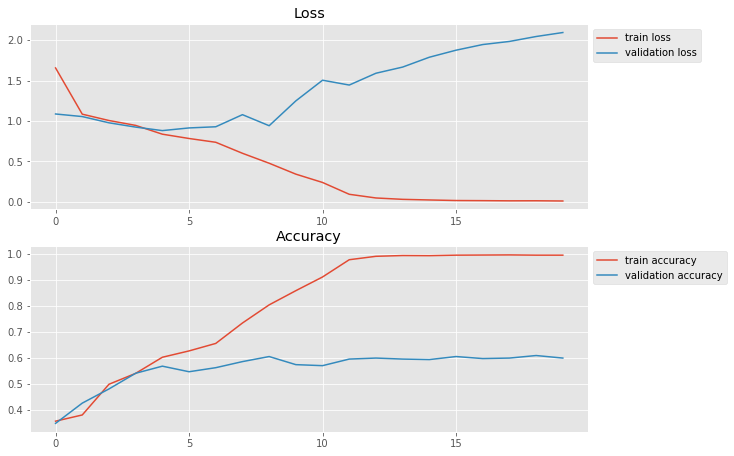

In [15]:
model_11 = create_vgg11(in_shape, num_cls)
model_11.load_weights("./trained_models/vgg11_best.hdf5")
model_11.compile(optimizer=Adam(learning_rate=0.0001),
                 loss="categorical_crossentropy", metrics=["accuracy"])
acc_scores["vgg11"], conf_matrices["vgg11"], class_reports["vgg11"] \
    = get_test_results(model_11, val_dat, val_lbls)

print(f"VGG-11 validation accuracy: {acc_scores['vgg11']}")
print("Confusion Matrix:")
print(conf_matrices['vgg11'])
print(class_reports['vgg11'])

vgg11_log = read_csv("./training_logs/vgg11_log.csv")

plt.style.use("ggplot")
plt.figure(figsize=[10, 7.5])
plt.subplot(211)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg11_log["loss"], label="train loss")
plt.plot(vgg11_log["val_loss"], label="validation loss")
plt.title("Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(212)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg11_log["acc"], label="train accuracy")
plt.plot(vgg11_log["val_acc"], label="validation accuracy")
plt.title("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

# Free memory
clear_session()
collect()
del model_11


#### VGG-13

VGG-13 validation accuracy: 0.630859375
Confusion Matrix:
[[ 69  65  32]
 [ 31 116  26]
 [  7  28 138]]
                precision    recall  f1-score   support

           car       0.64      0.42      0.51       166
heavy vehicles       0.56      0.67      0.61       173
    motorcycle       0.70      0.80      0.75       173

      accuracy                           0.63       512
     macro avg       0.63      0.63      0.62       512
  weighted avg       0.63      0.63      0.62       512



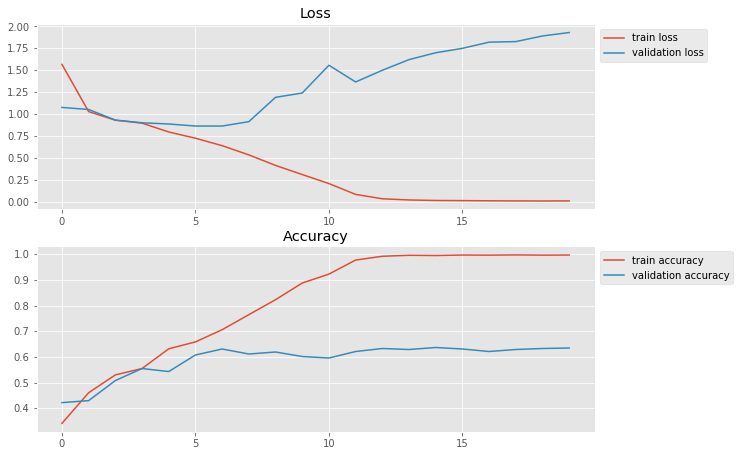

In [16]:
model_13 = create_vgg13(in_shape, num_cls)
model_13.load_weights("./trained_models/vgg13_best.hdf5")
model_13.compile(optimizer=Adam(learning_rate=0.0001),
                 loss="categorical_crossentropy", metrics=["accuracy"])
acc_scores["vgg13"], conf_matrices["vgg13"], class_reports["vgg13"] \
    = get_test_results(model_13, val_dat, val_lbls)

print(f"VGG-13 validation accuracy: {acc_scores['vgg13']}")
print("Confusion Matrix:")
print(conf_matrices['vgg13'])
print(class_reports['vgg13'])

vgg13_log = read_csv("./training_logs/vgg13_log.csv")

plt.style.use("ggplot")
plt.figure(figsize=[10, 7.5])
plt.subplot(211)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg13_log["loss"], label="train loss")
plt.plot(vgg13_log["val_loss"], label="validation loss")
plt.title("Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(212)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg13_log["acc"], label="train accuracy")
plt.plot(vgg13_log["val_acc"], label="validation accuracy")
plt.title("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

# Free memory
clear_session()
collect()
del model_13


#### VGG-16

VGG-16 validation accuracy: 0.611328125
Confusion Matrix:
[[ 70  74  22]
 [ 39 113  21]
 [ 23  20 130]]
                precision    recall  f1-score   support

           car       0.53      0.42      0.47       166
heavy vehicles       0.55      0.65      0.59       173
    motorcycle       0.75      0.75      0.75       173

      accuracy                           0.61       512
     macro avg       0.61      0.61      0.61       512
  weighted avg       0.61      0.61      0.61       512



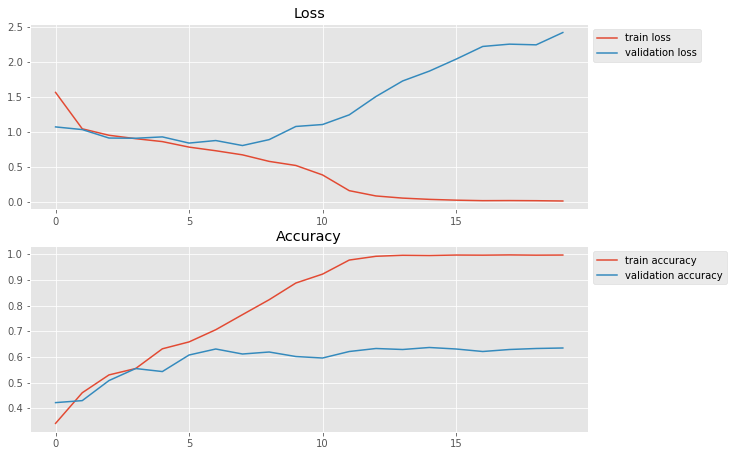

In [17]:
model_16 = create_vgg16(in_shape, num_cls)
model_16.load_weights("./trained_models/vgg16_best.hdf5")
model_16.compile(optimizer=Adam(learning_rate=0.0001),
                 loss="categorical_crossentropy", metrics=["accuracy"])
acc_scores["vgg16"], conf_matrices["vgg16"], class_reports["vgg16"] \
    = get_test_results(model_16, val_dat, val_lbls)

print(f"VGG-16 validation accuracy: {acc_scores['vgg16']}")
print("Confusion Matrix:")
print(conf_matrices['vgg16'])
print(class_reports['vgg16'])


vgg16_log = read_csv("./training_logs/vgg16_log.csv")

plt.style.use("ggplot")
plt.figure(figsize=[10, 7.5])
plt.subplot(211)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg16_log["loss"], label="train loss")
plt.plot(vgg16_log["val_loss"], label="validation loss")
plt.title("Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(212)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg13_log["acc"], label="train accuracy")
plt.plot(vgg13_log["val_acc"], label="validation accuracy")
plt.title("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

# Free memory
clear_session()
collect()
del model_16


#### VGG-16(Conv1)

VGG-16(Conv1) validation accuracy: 0.62890625
Confusion Matrix:
[[ 84  68  14]
 [ 39 120  14]
 [ 21  34 118]]
                precision    recall  f1-score   support

           car       0.58      0.51      0.54       166
heavy vehicles       0.54      0.69      0.61       173
    motorcycle       0.81      0.68      0.74       173

      accuracy                           0.63       512
     macro avg       0.64      0.63      0.63       512
  weighted avg       0.64      0.63      0.63       512



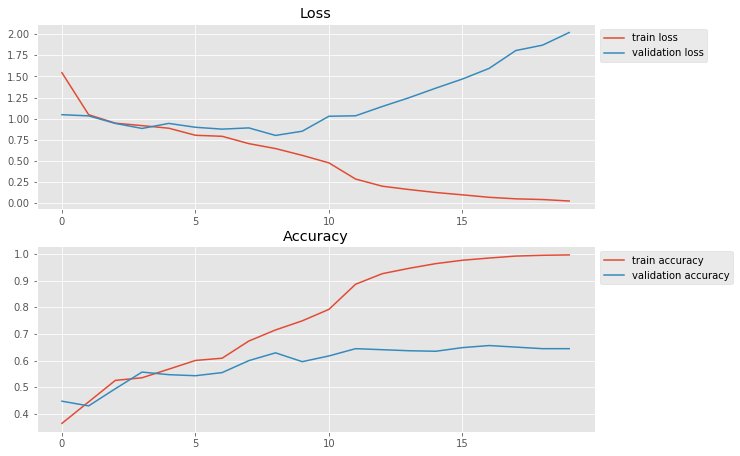

In [18]:
model_16_conv1 = create_vgg16_conv1(in_shape, num_cls)
model_16_conv1.load_weights("./trained_models/vgg16conv1_best.hdf5")
model_16_conv1.compile(optimizer=Adam(learning_rate=0.0001),
                       loss="categorical_crossentropy", metrics=["accuracy"])
acc_scores["vgg16conv1"], conf_matrices["vgg16conv1"], \
class_reports["vgg16conv1"] \
    = get_test_results(model_16_conv1, val_dat, val_lbls)

print(f"VGG-16(Conv1) validation accuracy: {acc_scores['vgg16conv1']}")
print("Confusion Matrix:")
print(conf_matrices['vgg16conv1'])
print(class_reports['vgg16conv1'])

vgg16conv1_log = read_csv("./training_logs/vgg16conv1_log.csv")

plt.style.use("ggplot")
plt.figure(figsize=[10, 7.5])
plt.subplot(211)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg16conv1_log["loss"], label="train loss")
plt.plot(vgg16conv1_log["val_loss"], label="validation loss")
plt.title("Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(212)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg16conv1_log["acc"], label="train accuracy")
plt.plot(vgg16conv1_log["val_acc"], label="validation accuracy")
plt.title("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

# Free memory
clear_session()
collect()
del model_16_conv1


#### VGG-19

VGG-19 validation accuracy: 0.576171875
Confusion Matrix:
[[ 53  72  41]
 [ 32 100  41]
 [ 10  21 142]]
                precision    recall  f1-score   support

           car       0.56      0.32      0.41       166
heavy vehicles       0.52      0.58      0.55       173
    motorcycle       0.63      0.82      0.72       173

      accuracy                           0.58       512
     macro avg       0.57      0.57      0.56       512
  weighted avg       0.57      0.58      0.56       512



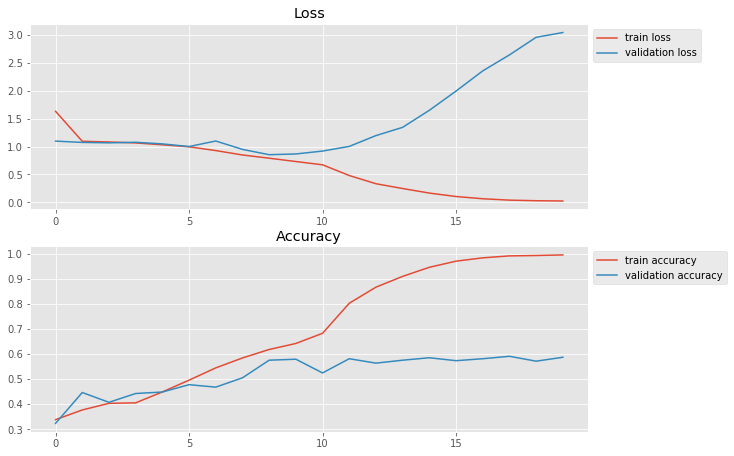

In [19]:
model_19 = create_vgg19(in_shape, num_cls)
model_19.load_weights("./trained_models/vgg19_best.hdf5")
model_19.compile(optimizer=Adam(learning_rate=0.0001),
                 loss="categorical_crossentropy", metrics=["accuracy"])
acc_scores["vgg19"], conf_matrices["vgg19"], class_reports["vgg19"] \
    = get_test_results(model_19, val_dat, val_lbls)

print(f"VGG-19 validation accuracy: {acc_scores['vgg19']}")
print("Confusion Matrix:")
print(conf_matrices['vgg19'])
print(class_reports['vgg19'])
   
vgg19_log = read_csv("./training_logs/vgg19_log.csv")

plt.style.use("ggplot")
plt.figure(figsize=[10, 7.5])
plt.subplot(211)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg19_log["loss"], label="train loss")
plt.plot(vgg19_log["val_loss"], label="validation loss")
plt.title("Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(212)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg19_log["acc"], label="train accuracy")
plt.plot(vgg19_log["val_acc"], label="validation accuracy")
plt.title("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

# Free memory
clear_session()
collect()
del model_19


#### Cross-Model Comparison

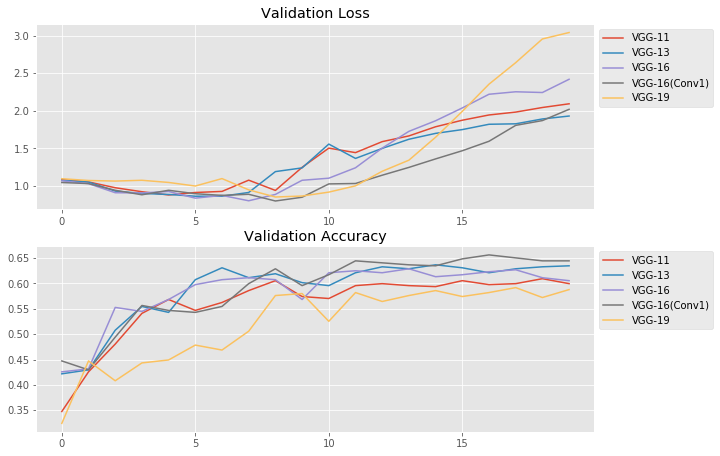

In [22]:
plt.style.use("ggplot")
plt.figure(figsize=[10, 7.5])
plt.subplot(211)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg11_log["val_loss"], label="VGG-11")
plt.plot(vgg13_log["val_loss"], label="VGG-13")
plt.plot(vgg16_log["val_loss"], label="VGG-16")
plt.plot(vgg16conv1_log["val_loss"], label="VGG-16(Conv1)")
plt.plot(vgg19_log["val_loss"], label="VGG-19")
plt.title("Validation Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(212)
plt.xticks([0, 5, 10, 15, 20])
plt.plot(vgg11_log["val_acc"], label="VGG-11")
plt.plot(vgg13_log["val_acc"], label="VGG-13")
plt.plot(vgg16_log["val_acc"], label="VGG-16")
plt.plot(vgg16conv1_log["val_acc"], label="VGG-16(Conv1)")
plt.plot(vgg19_log["val_acc"], label="VGG-19")
plt.title("Validation Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))


### Conclusion

From the above, we can observe that overfitting occurs in all models 
between the 5-10th epoch, and maximum validation accuracy is about 65%. 
However, this is before any regularisation measures are taken.

Based on the cross-model analysis comparisons, it can be seen that 
VGG-16 and VGG-16(Conv1) achieved the lowest validation loss, and at 
those points, VGG-16(Conv1) achieved the higher validation accuracy.

Therefore, we shall proceed to optimise the VGG-16(Conv1) model with
hyperparameter tuning, followed by regularisation.